**AIVLE School 미니프로젝트**
### **VOC를 제기한 고객의 <span style="color:darkgreen">해지 여부</span> 예측 문제**
---

[환경설정]
* 세부 요구사항
    - 경로 설정 : 구글콜랩
        * 구글 드라이브 바로 밑에 aice 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.


In [1]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Path
path = '/content/drive/MyDrive/aice/'

#### **<span style="color:red">[미션 안내]</span>**
* VOC를 제기한 고객의 데이터를 읽어들여 데이터를 분석 및 전처리한 후 머신러닝과 딥러닝으로 해지 여부를 예측하고 결과를 분석하세요.

#### **<span style="color:red">[유의 사항]</span>**
* 각 문항의 답안코드는 반드시 '#여기에 답안코드를 작성하세요'로 표시된 cell에 작성해야 합니다.
* 제공된 cell을 추가/삭제하고 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
* 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
* 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
* 문제와 데이터는 제3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.

In [3]:
# 코드실행시 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore')

<br>

## **<span style="color:black">1. 필요한 라이브러리 설치</span>**

<Br>
<font color=blue>1-1. pip 이용해서 seaborn을 설치하세요.</font>

In [4]:
# 여기에 답안코드를 작성하세요.

!pip install seaborn

<br>
<font color=blue>1-2. numpy 별칭을 np로, pandas 별칭을 pd로 해서 임포트 하세요</font>

In [5]:
# 여기에 답안코드를 작성하세요.

import numpy as np
import pandas as pd

<br>
<font color=blue>1-3. matplotlib 라이브러리를 plt로, seaborn을 sns로 해서 임포트 하세요

In [6]:
# 여기에 답안코드를 작성하세요.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<br>

## **<span style="color:black">2. Tabular 데이터 로딩</span>**

<br>
<font color=blue>2-1. pandas read_csv 함수를 사용하여 voc_data.csv 파일을 읽어온 후 df에 저장하세요.</font>

In [7]:
# 여기에 답안코드를 작성하세요.

df = pd.read_csv(path+'voc_data.csv')

<br>

## **<span style="color:black">3. 데이터의 구성 확인</span>**

<br>
<font color=blue>3-1. "df" DataFrame 이용해서 읽어들인 파일의 앞부분 5줄, 뒷부분 5줄을 출력하세요</font>

In [8]:
# 여기에 답안코드를 작성하세요.

df.head()

,voc_trt_perd_itg_cd,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,voc_trt_reslt_itg_cd,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,...,voc_dupl_tmscnt,oos_cause_type_itg_cd,voc_trt_need_time_itg_cd,engt_cperd_type_itg_cd,engt_tgt_div_itg_cd,cont_fns_pam_date,voc_mis_pbls_yn,fclt_oos_yn,cust_snsry_base_conf_need_time,trm_yn
0,_,1000665328,2153,10009,10002,_,F,1000001126,36,10001,...,0,_,10001,_,_,99991231,N,_,0,N
1,_,1001028714,3311,10009,10002,10081,G,1000852226,32,10001,...,0,_,10001,15098,15244,20220319,N,_,0,N
2,_,1001028567,1575,10009,10002,_,G,1000851875,52,10001,...,0,10268,10001,15097,15244,20220508,N,N,0,N
3,10000,1000665328,3546,10009,10002,_,_,1000001126,_,10001,...,0,_,10001,_,_,99991231,N,_,0,N
4,_,1000779276,3086,10009,10002,_,G,1000764639,50,10001,...,0,_,10001,_,_,99991231,N,_,0,N


In [9]:
# 여기에 답안코드를 작성하세요.

df.tail()

,voc_trt_perd_itg_cd,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,voc_trt_reslt_itg_cd,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,...,voc_dupl_tmscnt,oos_cause_type_itg_cd,voc_trt_need_time_itg_cd,engt_cperd_type_itg_cd,engt_tgt_div_itg_cd,cont_fns_pam_date,voc_mis_pbls_yn,fclt_oos_yn,cust_snsry_base_conf_need_time,trm_yn
9995,_,1000811136,2123,10009,10002,_,G,1000809259,17,10001,...,0,_,10001,_,_,99991231,N,_,0,N
9996,_,1001047799,2153,10009,10002,_,I,1001046521,35,10001,...,0,_,10001,_,_,99991231,N,_,0,N
9997,_,1001027819,379,10009,10002,_,G,1000720809,51,10001,...,0,10270,10001,15097,15244,20180903,N,N,0,N
9998,_,1001027819,314,10009,10002,_,I,1000720809,_,10001,...,0,_,10001,15097,15244,20210412,N,_,0,N
9999,_,1001047802,2266,10009,10002,_,G,1001046524,27,10001,...,0,_,10001,_,_,99991231,N,_,0,N


<br>
<font color=blue>3-2. 데이터프레임 정보(컬럼정보, Null 여부, 타입) 출력하세요</font>

In [10]:
# 여기에 답안코드를 작성하세요.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   voc_trt_perd_itg_cd             10000 non-null  object
 1   voc_prod_sbt_id                 10000 non-null  int64 
 2   voc_wjt_sorc_id                 10000 non-null  int64 
 3   voc_type_itg_cd                 10000 non-null  int64 
 4   voc_sttus_itg_cd                10000 non-null  int64 
 5   voc_trt_reslt_itg_cd            10000 non-null  object
 6   cust_clas_itg_cd                10000 non-null  object
 7   bprod_sbt_id                    10000 non-null  int64 
 8   age_itg_cd                      10000 non-null  object
 9   cont_sttus_itg_cd               10000 non-null  object
 10  new_date                        10000 non-null  int64 
 11  opn_nfl_chg_date                10000 non-null  int64 
 12  cust_dtl_ctg_itg_cd             10000 non-null 

<br>
<font color=blue>3-3. 데이터프레임 인덱스를 확인하세요</font>

In [11]:
# 여기에 답안코드를 작성하세요.

df.index

RangeIndex(start=0, stop=10000, step=1)

<br>
<font color=blue>3-4. 데이터프레임 컬럼을 확인하세요</font>

In [12]:
# 여기에 답안코드를 작성하세요.

df.columns

Index(['voc_trt_perd_itg_cd', 'voc_prod_sbt_id', 'voc_wjt_sorc_id',
       'voc_type_itg_cd', 'voc_sttus_itg_cd', 'voc_trt_reslt_itg_cd',
       'cust_clas_itg_cd', 'bprod_sbt_id', 'age_itg_cd', 'cont_sttus_itg_cd',
       'new_date', 'opn_nfl_chg_date', 'cust_dtl_ctg_itg_cd',
       'voc_trt_degr_div_itg_cd', 'voc_dupl_tmscnt', 'oos_cause_type_itg_cd',
       'voc_trt_need_time_itg_cd', 'engt_cperd_type_itg_cd',
       'engt_tgt_div_itg_cd', 'cont_fns_pam_date', 'voc_mis_pbls_yn',
       'fclt_oos_yn', 'cust_snsry_base_conf_need_time', 'trm_yn'],
      dtype='object')

<br>
<font color=blue>3-5. 데이터프레임 값(value)을 확인하세요</font>

In [13]:
# 여기에 답안코드를 작성하세요.

df.values

array([['_', 1000665328, 2153, ..., '_', 0, 'N'],
       ['_', 1001028714, 3311, ..., '_', 0, 'N'],
       ['_', 1001028567, 1575, ..., 'N', 0, 'N'],
       ...,
       ['_', 1001027819, 379, ..., 'N', 0, 'N'],
       ['_', 1001027819, 314, ..., '_', 0, 'N'],
       ['_', 1001047802, 2266, ..., '_', 0, 'N']], dtype=object)

<br>
<font color=blue>3-6. 데이터프레임의 계산 가능한 값들에 대한 통계치를 확인하세요</font>

In [14]:
# 여기에 답안코드를 작성하세요.

df.describe()

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,bprod_sbt_id,new_date,opn_nfl_chg_date,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cont_fns_pam_date,cust_snsry_base_conf_need_time
count,1.000000e+04,10000.00000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000
mean,9.907267e+08,1578.29170,10008.52360,10002.043400,8.838173e+08,1.744283e+07,1.744505e+07,20001.074200,0.008800,10002.656800,7.004469e+07,193.88010
std,1.005780e+08,1078.63717,1.57927,0.314843,3.214229e+08,6.849207e+06,6.850077e+06,0.262109,0.103555,6.576864,3.863802e+07,6970.03853
min,-9.980000e+02,126.00000,10003.00000,10002.000000,-9.980000e+02,1.010100e+04,1.010100e+04,20001.000000,0.000000,10001.000000,2.001063e+07,0.00000
25%,1.000782e+09,360.00000,10009.00000,10002.000000,1.000003e+09,2.008053e+07,2.008123e+07,20001.000000,0.000000,10001.000000,2.021102e+07,0.00000
50%,1.001028e+09,2056.00000,10009.00000,10002.000000,1.000749e+09,2.014121e+07,2.015031e+07,20001.000000,0.000000,10001.000000,9.999123e+07,0.00000
75%,1.001036e+09,2153.00000,10009.00000,10002.000000,1.001044e+09,2.018010e+07,2.018032e+07,20001.000000,0.000000,10001.000000,9.999123e+07,0.00000
max,1.001079e+09,3856.00000,10017.00000,10005.000000,1.001078e+09,2.020041e+07,2.020041e+07,20002.000000,3.000000,10038.000000,9.999123e+07,367991.00000


<br>
<font color=blue>3-7. DataFrame 컬럼 항목에 Null 존재하는지 확인하세요.  (null값의 합계 포함)</font>

In [16]:
# 여기에 답안코드를 작성하세요.

df.isnull().sum()

,0
voc_trt_perd_itg_cd,0
voc_prod_sbt_id,0
voc_wjt_sorc_id,0
voc_type_itg_cd,0
voc_sttus_itg_cd,0
voc_trt_reslt_itg_cd,0
cust_clas_itg_cd,0
bprod_sbt_id,0
age_itg_cd,0
cont_sttus_itg_cd,0


<br>
<font color=blue>3-8. voc_trt_perd_itg_cd 컬럼의 데이터를 확인하세요</font>

In [17]:
# 여기에 답안코드를 작성하세요.

df['voc_trt_perd_itg_cd']

,voc_trt_perd_itg_cd
0,_
1,_
2,_
3,10000
4,_
...,...
9995,_
9996,_
9997,_
9998,_


<br>
<font color=blue>3-9. voc_trt_perd_itg_cd 컬럼 데이터별 건수를 나열하세요</font>

In [18]:
# 여기에 답안코드를 작성하세요.

df['voc_trt_perd_itg_cd'].value_counts()

,count
voc_trt_perd_itg_cd,
_,5422
10000,4283
10001,163
10002,58
10003,25
10004,16
10005,10
10006,6
10008,3


### 컬럼에서  '_' 값이 차지하는 비율
- voc_trt_perd_itg_cd : 0.54
- voc_trt_reslt_itg_cd : 0.88
- oos_cause_type_itg_cd : 0.9
- engt_cperd_type_itg_cd : 0.63
- engt_tgt_div_itg_cd : 0.63
- fclt_oos_yn : 0.90  
- cust_clas_itg_cd : 0.2
- age_itg_cd : 0.22
- cont_sttus_itg_cd : 0.11
- cust_dtl_ctg_itg_cd : 0.11
- voc_mis_pbls_yn : 0.008


## **<span style="color:black">4. 데이터 결측치 처리</span>**

<br>
<font color=blue>4-1. voc_trt_perd_itg_cd 컬럼에서 '_' 값이 차지하는 비율이 50%가 넘는 것을 확인하고, 이 voc_trt_perd_itg_cd 컬럼을 삭제하세요. (컬럼이 삭제된 데이터를 df1에 저장하세요)</font>

In [19]:
df

,voc_trt_perd_itg_cd,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,voc_trt_reslt_itg_cd,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,...,voc_dupl_tmscnt,oos_cause_type_itg_cd,voc_trt_need_time_itg_cd,engt_cperd_type_itg_cd,engt_tgt_div_itg_cd,cont_fns_pam_date,voc_mis_pbls_yn,fclt_oos_yn,cust_snsry_base_conf_need_time,trm_yn
0,_,1000665328,2153,10009,10002,_,F,1000001126,36,10001,...,0,_,10001,_,_,99991231,N,_,0,N
1,_,1001028714,3311,10009,10002,10081,G,1000852226,32,10001,...,0,_,10001,15098,15244,20220319,N,_,0,N
2,_,1001028567,1575,10009,10002,_,G,1000851875,52,10001,...,0,10268,10001,15097,15244,20220508,N,N,0,N
3,10000,1000665328,3546,10009,10002,_,_,1000001126,_,10001,...,0,_,10001,_,_,99991231,N,_,0,N
4,_,1000779276,3086,10009,10002,_,G,1000764639,50,10001,...,0,_,10001,_,_,99991231,N,_,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,_,1000811136,2123,10009,10002,_,G,1000809259,17,10001,...,0,_,10001,_,_,99991231,N,_,0,N
9996,_,1001047799,2153,10009,10002,_,I,1001046521,35,10001,...,0,_,10001,_,_,99991231,N,_,0,N
9997,_,1001027819,379,10009,10002,_,G,1000720809,51,10001,...,0,10270,10001,15097,15244,20180903,N,N,0,N
9998,_,1001027819,314,10009,10002,_,I,1000720809,_,10001,...,0,_,10001,15097,15244,20210412,N,_,0,N


In [20]:
# 여기에 답안코드를 작성하세요.

df['voc_trt_perd_itg_cd'].value_counts(normalize = True)
df1 = df.drop(columns=['voc_trt_perd_itg_cd'])
# df1 = df.drop(['voc_trt_perd_itg_cd'], axis=1)

In [21]:
df1

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,voc_trt_reslt_itg_cd,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,new_date,...,voc_dupl_tmscnt,oos_cause_type_itg_cd,voc_trt_need_time_itg_cd,engt_cperd_type_itg_cd,engt_tgt_div_itg_cd,cont_fns_pam_date,voc_mis_pbls_yn,fclt_oos_yn,cust_snsry_base_conf_need_time,trm_yn
0,1000665328,2153,10009,10002,_,F,1000001126,36,10001,19881005,...,0,_,10001,_,_,99991231,N,_,0,N
1,1001028714,3311,10009,10002,10081,G,1000852226,32,10001,20130817,...,0,_,10001,15098,15244,20220319,N,_,0,N
2,1001028567,1575,10009,10002,_,G,1000851875,52,10001,20190509,...,0,10268,10001,15097,15244,20220508,N,N,0,N
3,1000665328,3546,10009,10002,_,_,1000001126,_,10001,20190731,...,0,_,10001,_,_,99991231,N,_,0,N
4,1000779276,3086,10009,10002,_,G,1000764639,50,10001,20180403,...,0,_,10001,_,_,99991231,N,_,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1000811136,2123,10009,10002,_,G,1000809259,17,10001,20180313,...,0,_,10001,_,_,99991231,N,_,0,N
9996,1001047799,2153,10009,10002,_,I,1001046521,35,10001,20141208,...,0,_,10001,_,_,99991231,N,_,0,N
9997,1001027819,379,10009,10002,_,G,1000720809,51,10001,20150904,...,0,10270,10001,15097,15244,20180903,N,N,0,N
9998,1001027819,314,10009,10002,_,I,1000720809,_,10001,20160206,...,0,_,10001,15097,15244,20210412,N,_,0,N


<br>
<font color=blue>4-2. 'df1' DataFrame에서 '_' 값이 50% 이상되는 나머지 컬럼도 삭제하세요</font>

In [22]:
# 여기에 답안코드를 작성하세요.

df1 = df1.drop(columns=['voc_trt_reslt_itg_cd',
                       'oos_cause_type_itg_cd',
                       'engt_cperd_type_itg_cd',
                       'engt_tgt_div_itg_cd',
                       'fclt_oos_yn'
                      ])

In [23]:
df1

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,new_date,opn_nfl_chg_date,cust_dtl_ctg_itg_cd,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cont_fns_pam_date,voc_mis_pbls_yn,cust_snsry_base_conf_need_time,trm_yn
0,1000665328,2153,10009,10002,F,1000001126,36,10001,19881005,19881005,10003,20001,0,10001,99991231,N,0,N
1,1001028714,3311,10009,10002,G,1000852226,32,10001,20130817,20130817,10002,20001,0,10001,20220319,N,0,N
2,1001028567,1575,10009,10002,G,1000851875,52,10001,20190509,20190509,10003,20001,0,10001,20220508,N,0,N
3,1000665328,3546,10009,10002,_,1000001126,_,10001,20190731,20190731,90024,20001,0,10001,99991231,N,0,N
4,1000779276,3086,10009,10002,G,1000764639,50,10001,20180403,20180403,90024,20001,0,10001,99991231,N,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1000811136,2123,10009,10002,G,1000809259,17,10001,20180313,20180313,10003,20001,0,10001,99991231,N,0,N
9996,1001047799,2153,10009,10002,I,1001046521,35,10001,20141208,20181130,10003,20001,0,10001,99991231,N,0,N
9997,1001027819,379,10009,10002,G,1000720809,51,10001,20150904,20150904,90029,20001,0,10001,20180903,N,0,N
9998,1001027819,314,10009,10002,I,1000720809,_,10001,20160206,20160206,90029,20001,0,10001,20210412,N,0,N


<br>
<font color=blue>4-3. 'df1' DataFrame의 'cust_clas_itg_cd' 컬럼에 '_' 값이 몇 개 있는지 확인하여 출력하세요 </font>

In [24]:
# 여기에 답안코드를 작성하세요.

count = (df1['cust_clas_itg_cd'] == '_').sum()
print(count)

1934


<br>
<font color=blue>4-4. df1의 남아있는 '_'값을 null로 변경: DataFrame replace 함수를 사용해서 모든 컬럼에 대해 '_'값을 null로 변경하고 df2에 저장하세요.</font>

In [25]:
# 여기에 답안코드를 작성하세요.

df2 = df1.replace('_', np.nan)

<br>
<font color=blue>4-5. df2의 컬럼별 Null 갯수를 확인해보세요.</font>

In [26]:
# 여기에 답안코드를 작성하세요.

df2.isnull().sum()

,0
voc_prod_sbt_id,0
voc_wjt_sorc_id,0
voc_type_itg_cd,0
voc_sttus_itg_cd,0
cust_clas_itg_cd,1934
bprod_sbt_id,0
age_itg_cd,2129
cont_sttus_itg_cd,1168
new_date,0
opn_nfl_chg_date,0


<br>
<font color=blue>4-6. df2 데이터프레임 컬럼들의 데이터타입을 확인하세요.</font>

In [36]:
# 여기에 답안코드를 작성하세요.

df2.dtypes

,0
voc_prod_sbt_id,int64
voc_wjt_sorc_id,int64
voc_type_itg_cd,int64
voc_sttus_itg_cd,int64
cust_clas_itg_cd,object
bprod_sbt_id,int64
age_itg_cd,object
cont_sttus_itg_cd,object
new_date,int64
opn_nfl_chg_date,int64


<br>
<font color=blue>4-7. df2 데이터프레임에 대해 먼저, 'cust_clas_itg_cd' 컬럼의 최빈값을 확인하는 코드로 확인하고 다음으로, 이 컬럼의 Null 값을 최빈값으로 변경하세요(fillna 함수 사용). 처리된 데이터프레임은 df3에 저장하세요</font>

In [37]:
# 여기에 답안코드를 작성하세요.

L = df2['cust_clas_itg_cd'].mode() #최빈값이 'L'이다

df2['cust_clas_itg_cd'].fillna('L', inplace = True)

df3 = df2.copy()

<br>
<font color=blue>4-8. df3에 대해 'age_itg_cd'의 null 값을 중앙값(median)으로 변경하고 데이터 타입을 정수(int)로 변경하세요. 데이터 처리 후 데이터프레임을 df4에 저장하세요.</font>

In [ ]:
# 여기에 답안코드를 작성하세요.
df4 = df3.copy()
df3.dropna(axis=0, inplace = True)
df3 = df3.astype({'age_itg_cd': 'int'})
df3['age_itg_cd'].median()
#49
df3['age_itg_cd'].replace('NaN',49)
df4 = df3.copy()

#df3['age_itg_cd'].fillna(df3['age_itg_cd'].median(), inplace = True)
#df4 = df3.astype({'age_itg_cd': 'int'})

<br>
<font color=blue>4-9. df4에 대해 'cont_sttus_itg_cd'의 null 값을 최빈값(mode)으로 변경하세요. 데이터 처리 후 데이터프레임을 df5에 저장하세요.</font>

In [41]:
# 여기에 답안코드를 작성하세요.

df4.replace({'cont_sttus_itg_cd' : {np.nan : df4['cont_sttus_itg_cd'].mode()}}, inplace = True)
df5 = df4.copy()

<br>
<font color=blue>4-10. df5에 대해 'cust_dtl_ctg_itg_cd'의 null 값을 최빈값(mode)으로 변경하세요</font>

In [42]:
# 여기에 답안코드를 작성하세요.

df5['cust_dtl_ctg_itg_cd'].value_counts()
df5['cust_dtl_ctg_itg_cd'].replace(np.nan,'10003', inplace=True)

<br>
<font color=blue>4-11. df5에 대해 다음 날짜 관련 컬럼을 확인 후 삭제하세요. (날짜 관련 컬럼: new_date, opn_nfl_chg_date, cont_fns_pam_date)</font>

In [43]:
# 여기에 답안코드를 작성하세요.

df5.drop(columns=['new_date', 'opn_nfl_chg_date', 'cont_fns_pam_date'], inplace=True)

<br>
<font color=blue>4-12. df5에 대해 'voc_mis_pbls_yn' 컬럼을 삭제하세요.</font>

In [44]:
# 여기에 답안코드를 작성하세요.

df5.drop('voc_mis_pbls_yn', axis = 1, inplace=True)

## **<span style="color:black">5. 라벨 인코딩, 원핫 인코딩</span>**

In [45]:
!pip install scikit-learn

<br>
<font color=blue>5-1. df5에 대해 object 타입 컬럼을 cat_cols에 저장하세요. 그 중 cat_cols의 cust_clas_itg_cd 컬럼에 대해 LabelEncoder를 적용해보세요. (적용 후 df5에 저장)</font>

In [46]:
# 여기에 답안코드를 작성하세요.

cat_cols = df5.select_dtypes(include='object')

from sklearn.preprocessing import LabelEncoder

# LabelEncoder
le = LabelEncoder()
df5['cust_clas_itg_cd'] = le.fit_transform(cat_cols['cust_clas_itg_cd'])

In [47]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7811 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   voc_prod_sbt_id                 7811 non-null   int64 
 1   voc_wjt_sorc_id                 7811 non-null   int64 
 2   voc_type_itg_cd                 7811 non-null   int64 
 3   voc_sttus_itg_cd                7811 non-null   int64 
 4   cust_clas_itg_cd                7811 non-null   int64 
 5   bprod_sbt_id                    7811 non-null   int64 
 6   age_itg_cd                      7811 non-null   int64 
 7   cont_sttus_itg_cd               7811 non-null   object
 8   cust_dtl_ctg_itg_cd             7811 non-null   object
 9   voc_trt_degr_div_itg_cd         7811 non-null   int64 
 10  voc_dupl_tmscnt                 7811 non-null   int64 
 11  voc_trt_need_time_itg_cd        7811 non-null   int64 
 12  cust_snsry_base_conf_need_time  7811 non-null   int64

<br>
<font color=blue>5-2. df5의 나머지 object 컬럼에 대해서 One-Hot Encoding될수 있도록 Pandas의 get_dummies 함수를 적용하세요. (적용 후 df6에 저장)</font>

In [48]:
# 여기에 답안코드를 작성하세요.

df5.dtypes
df6 = pd.get_dummies(data=df5, columns=['cont_sttus_itg_cd', 'cust_dtl_ctg_itg_cd', 'trm_yn'], drop_first=True)
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7811 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   voc_prod_sbt_id                 7811 non-null   int64
 1   voc_wjt_sorc_id                 7811 non-null   int64
 2   voc_type_itg_cd                 7811 non-null   int64
 3   voc_sttus_itg_cd                7811 non-null   int64
 4   cust_clas_itg_cd                7811 non-null   int64
 5   bprod_sbt_id                    7811 non-null   int64
 6   age_itg_cd                      7811 non-null   int64
 7   voc_trt_degr_div_itg_cd         7811 non-null   int64
 8   voc_dupl_tmscnt                 7811 non-null   int64
 9   voc_trt_need_time_itg_cd        7811 non-null   int64
 10  cust_snsry_base_conf_need_time  7811 non-null   int64
 11  cont_sttus_itg_cd_10002         7811 non-null   bool 
 12  cont_sttus_itg_cd_10003         7811 non-null   bool 
 13  cont_stt

## **<span style="color:black">6. x,y 데이터 분리</span>**

<br>
<font color=blue>6-1. df6에 대해 X, y 값을 가지고 8:2 비율로 Train , Test Dataset으로 나누세요. (y 클래스 비율에 맞게 분리, y 값은 'trm_yn_Y' 컬럼, random_state는 42)</font>

In [49]:
# 여기에 답안코드를 작성하세요.

from sklearn.model_selection import train_test_split

target = 'trm_yn_Y'
X = df6.drop(target, axis = 1)
y = df6.loc[:, target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

<br>

## **<span style="color:black">7. 데이터 정규분포화, 표준화</span>**

<br>
<font color=blue>7-1. 사이킷런의 StandardScaler로 훈련데이터셋은 정규분포화(fit_transform)하고 테스트 데이터셋은 표준화(transform)하세요.</font>

In [50]:
# 여기에 답안코드를 작성하세요.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **<span style="color:black">8. 머신러닝 모델링 & 모델 성능평가 및 그래프 출력</span>**

### 로지스틱 회귀 (LogisticRegression, 분류)

<br>
<font color=blue>8-1. LogisticRegression 모델을 만들고 학습을 진행하세요 (단, 규제강도C는 10으로 설정, 계산에 사용할 작업수 max_iter는 2000으로 설정하세요)</font>

In [51]:
# 여기에 답안코드를 작성하세요.

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=10, max_iter=2000)
LR.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=2000)

<br>
<font color=blue>8-2. 위 모델의 성능을 평가하려고 합니다. y값을 예측하여 confusion matrix를 구하고 heatmap 그래프로 시각화하세요. 그리고 Scikit-learn의 classification_report를 활용하여 성능을 출력하세요.</font>

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1524
        True       0.00      0.00      0.00        39

    accuracy                           0.97      1563
   macro avg       0.49      0.50      0.49      1563
weighted avg       0.95      0.97      0.96      1563



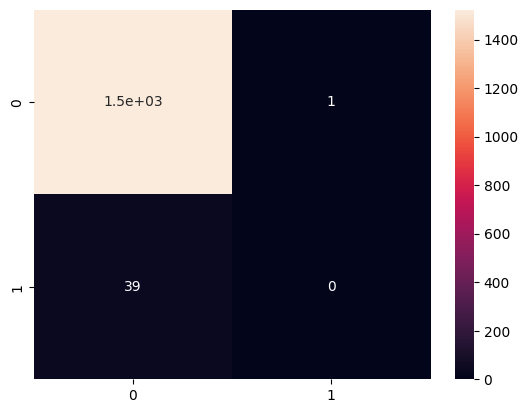

In [52]:
# 여기에 답안코드를 작성하세요.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = LR.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

<br>
<font color=blue>8-3. DecisionTree 모델을 만들고 학습을 진행하세요. (단, max_depth는 10, random_state는 42로 설정)</font>

In [53]:
# 여기에 답안코드를 작성하세요.

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9660908509277031

<br>
<font color=blue>8-4. RandomForest 모델을 만들고 학습을 진행하세요. (단, n_estimators=100, random_state=42 설정)</font>

In [54]:
# 여기에 답안코드를 작성하세요.

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9724888035828535

<br>
<font color=blue>8-5. XGBoost 모델을 만들고 학습을 진행하세요. (단, n_estimators=5 설정)</font>

In [55]:
# 여기에 답안코드를 작성하세요.

!pip install xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=5)
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1522    2]
 [  37    2]]


<br>
<font color=blue>8-6. Light GBM 모델을 만들고 학습을 진행하세요. (단, n_estimators=3 설정)</font>

In [56]:
# 여기에 답안코드를 작성하세요.

!pip install lightgbm
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(n_estimators=3)
lgbm_model.fit(X_train, y_train)
lgbm_model.score(X_test, y_test)

y_pred = lgbm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[LightGBM] [Info] Number of positive: 155, number of negative: 6093
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 6248, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.024808 -> initscore=-3.671471
[LightGBM] [Info] Start training from score -3.671471
[[1524    0]
 [  39    0]]


<br>
<font color=blue>8-7. Linear Regression 모델을 연습으로 만들고 학습을 진행하세요.</font>

In [57]:
# 이 데이터로 연습하세요.
x_data = np.array([1.6, 2.3, 3.5, 4.6]).reshape(-1,1)
y_data = np.array([3.3, 5.5, 7.2, 9.9])

In [58]:
# 여기에 답안코드를 작성하세요.

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_data, y_data)
lr.score(x_data, y_data)
lr.predict([[5]])

array([10.64610266])

<br>

## **<span style="color:black">9. 딥러닝 모델링 & 모델 성능평가 및 그래프 출력</span>**

<br>
<font color=blue>9-1. 아래 가이드대로 해지여부를 분류하는 딥러닝 모델을 만드세요.</font>

In [59]:
!pip install tensorflow

+ 첫번째 Hidden Layer : unit 64 , activation='relu'
+ 두번째 Hidden Layer : unit 32 , activation='relu'
+ 세번째 Hidden Layer : unit 16 , activation='relu'
+ 각 Hidden Layer 마다 Dropout 0.2 비율로 되도록 하세요.
+ EarlyStopping 콜백을 적용하고 ModelCheckpoint 콜백으로 validation performance가 좋은 모델을 best_model.keras 모델로 저장하세요.
+ batch_size는 10, epochs는 10으로 설정하세요.

In [60]:
# 여기에 답안코드를 작성하세요.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

try:
    model = Sequential()

    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

    es = EarlyStopping(monitor='val_loss', patience=4, mode='min', verbose=1)
    mc = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)


    history = model.fit(X_train, y_train,
                        batch_size=10,
                        epochs=10,
                        callbacks=[es, mc],
                        validation_data=(X_test, y_test),
                        verbose=1)

except ModuleNotFoundError:
    print("필요한 모듈이 설치되어 있지 않습니다.")

Epoch 1/10
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9493 - loss: 0.2193
Epoch 1: val_loss improved from inf to 0.10547, saving model to best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.9494 - loss: 0.2191 - val_acc: 0.9750 - val_loss: 0.1055
Epoch 2/10
607/625 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9717 - loss: 0.1319
Epoch 2: val_loss did not improve from 0.10547
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9718 - loss: 0.1315 - val_acc: 0.9738 - val_loss: 0.1094
Epoch 3/10
610/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9744 - loss: 0.1121
Epoch 3: val_loss did not improve from 0.10547
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9744 - loss: 0.1121 - val_acc: 0.9731 - val_loss: 0.1062
Epoch 4/10
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9736 - loss: 0.1062
Epoch 4: val_loss improved from 0.10547 to 0.10261, saving model to best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9736 - loss: 0.1062 - val_acc: 0.9738 - val_l

<br>
<font color=blue>9-2. y_train, y_test를 원핫 인코딩 후 다중 분류하는 딥러닝 모델을 만드세요. 9-1과 동일한 가이드 적용</font>

In [61]:
# 여기에 답안코드를 작성하세요.

from keras.utils import to_categorical
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)



model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['acc'])

history = model.fit(X_train, y_train_ohe, batch_size=10, epochs=10, callbacks=[es,mc], validation_data=(X_test, y_test_ohe), verbose=1)

model.save('voc_model.keras')

Epoch 1/10
611/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9004 - loss: 0.2769
Epoch 1: val_loss did not improve from 0.10261
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.9018 - loss: 0.2744 - val_acc: 0.9750 - val_loss: 0.1042
Epoch 2/10
601/625 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9705 - loss: 0.1234
Epoch 2: val_loss did not improve from 0.10261
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9707 - loss: 0.1229 - val_acc: 0.9738 - val_loss: 0.1086
Epoch 3/10
600/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9737 - loss: 0.1092
Epoch 3: val_loss did not improve from 0.10261
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9738 - loss: 0.1091 - val_acc: 0.9738 - val_loss: 0.1074
Epoch 4/10
616/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9781 - loss: 0.0944
Epoch 4: val_loss did not improve from 0.10261
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9781 - loss: 0.0946 - val_acc: 0.9738 - val_loss: 0.1075
Epoch 5/10
605/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0

In [62]:
# 참고
# Y 레이블 One-Hot-Encoding 되지 않았으면 loss='sparse_categorical_crossentropy' 사용
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc'])
# history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=[es,mc], validation_data=(X_test, y_test), verbose=1)

<br>
<font color=blue>9-3. 모델 성능을 평가해서 그래프로 표현하세요. 학습 정확도와 검증정확도를 그래프로 표시하고 xlabel에는 Epochs, ylabel에는 Accuracy, 범례에는 Train과 Validation으로 표시하세요..</font>

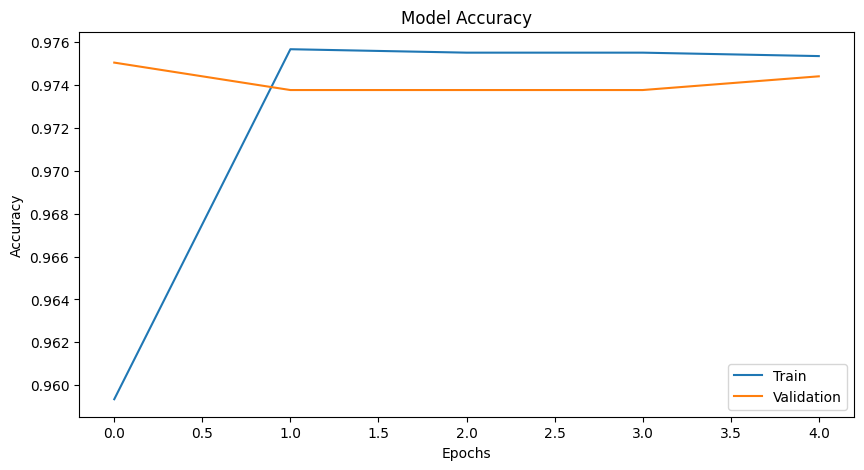

In [63]:
# 여기에 답안코드를 작성하세요.

plt.figure(figsize=(10,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'], loc='lower right')

<br>
<font color=blue>9-4. 모델 성능을 평가해서 그래프로 표현하세요. 학습 손실과 검증 손실을 그래프로 표시하고 xlabel에는 Epochs, ylabel에는 Loss, 범례에는 Train Loss와 Validation Loss로 표시하세요.</font>

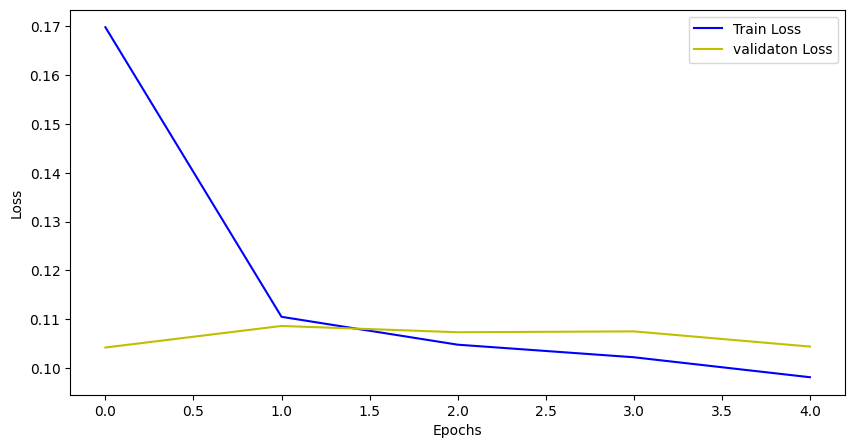

In [64]:
# 여기에 답안코드를 작성하세요.

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], 'b', label='Train Loss')
plt.plot(history.history['val_loss'], 'y', label='validaton Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

<br>
<font color=blue>9-5. y값을 예측하여 y_test_pred에 저장하고 정확도를 출력하세요..</font>

In [65]:
# 여기에 답안코드를 작성하세요.

y_test_pred = model.predict(X_test, batch_size=10, verbose=1)

y_test = np.argmax(y_test_ohe, axis=1)
y_test_pred = np.argmax(y_test_pred, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.9744081893793985